# A Study of the Lifespan and Careers of the Prime Ministers of India

---------


This post was partly inspired by the [post](https://www.reddit.com/r/dataisbeautiful/comments/7ioatb/lifespans_of_the_presidents_of_the_united_states/) made on Reddit about the US Presidents, and by a need to understand the career of the Prime Ministers as well. I will be adding additional details to this jupyter-notebook so that we can get a better perspective of the people who have held that post in the past.

![Prime Minister](primeministers.png)

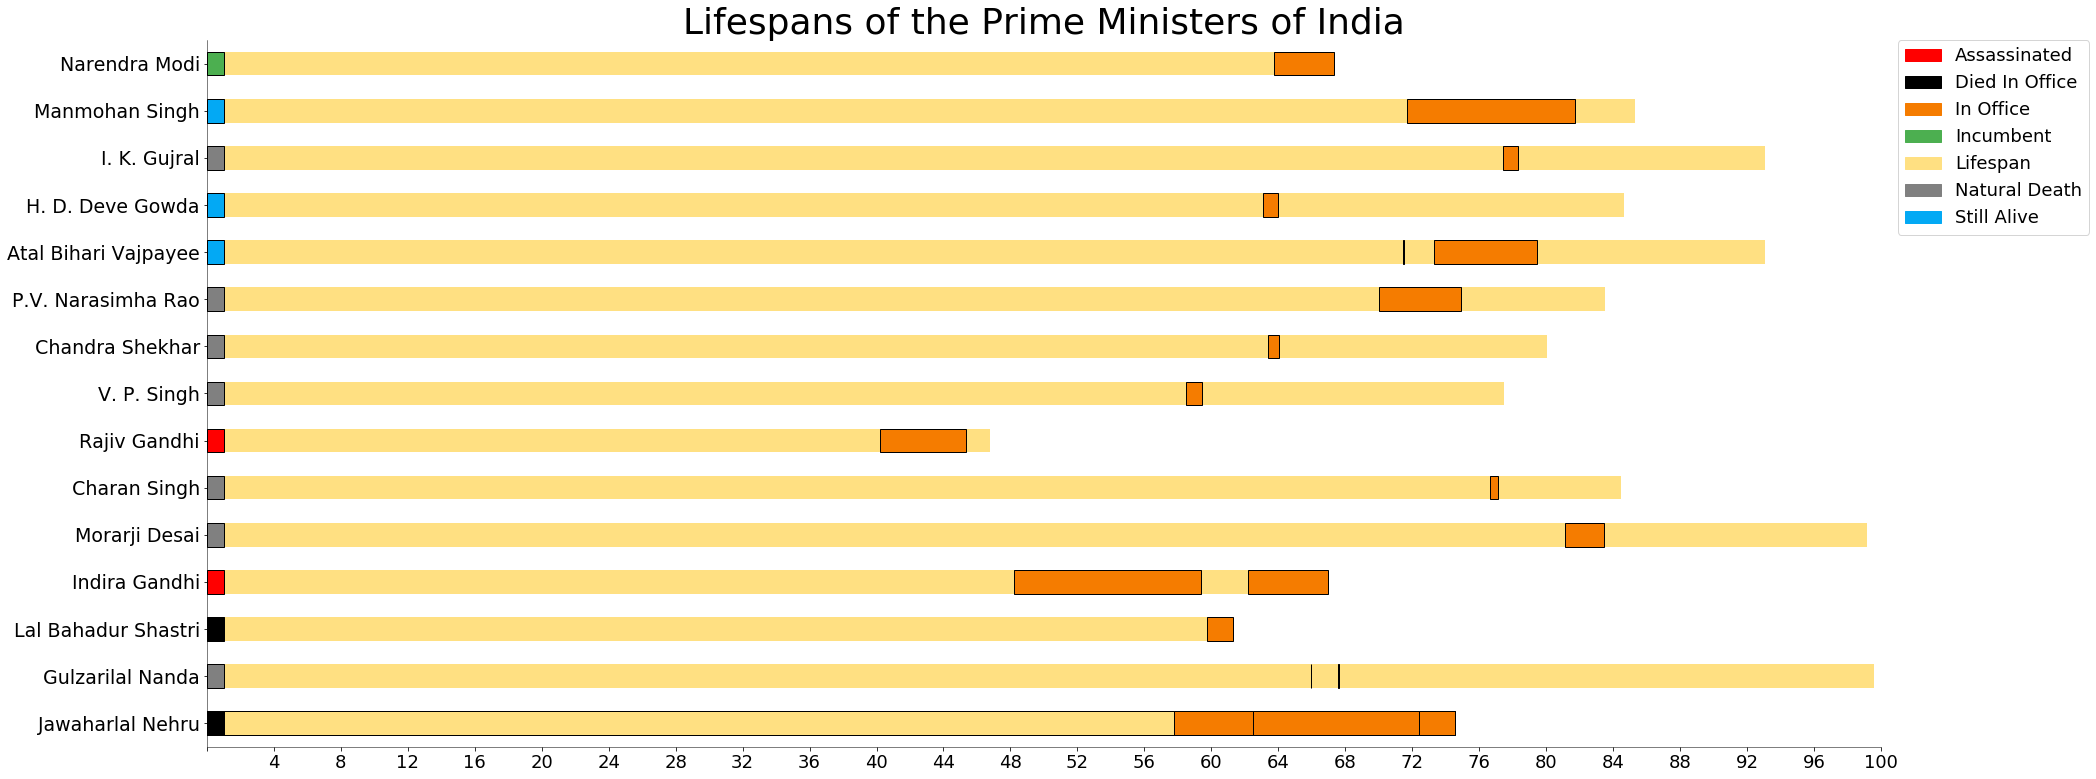

In [1]:
import datetime
import pandas as pd
from IPython.display import display

import warnings
warnings.filterwarnings("ignore")

from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator, FormatStrFormatter


colors = {
    "incumbent":"#4CAF50",
    "assassinated":"red",
    "still alive":"#03A9F4",
    "died in office": "black",
    "natural death": "grey",
    "in office":"#F57C00",
    "lifespan":"#FFE082"
}

table= pd.read_excel("data.xlsx")

date_columns = ["Date of Birth","Date of Death","Term Start", "Term End"]
for date_column in date_columns:
    table[date_column] = pd.to_datetime(table[date_column])
    table[date_column] = [x.date() for x in table[date_column]]


table["Age"] = [(y-x).days if not pd.isnull(y) else (datetime.datetime.today().date()-x).days for x,y in zip(table["Date of Birth"], table["Date of Death"])]
table["Age"] = [x/365 for x in table["Age"]]

table["age_term_start"] = [(y-x).days if not pd.isnull(y) else (datetime.datetime.today().date()-x).days for x,y in zip(table["Date of Birth"], table["Term Start"])]
table["age_term_start"] = [x/365 for x in table["age_term_start"]]

table["age_term_end"] = [(y-x).days if not pd.isnull(y) else (datetime.datetime.today().date()-x).days for x,y in zip(table["Date of Birth"], table["Term End"])]
table["age_term_end"] = [x/365 for x in table["age_term_end"]]
                           

plt.rcParams["figure.figsize"]=(30, 13)
#plt.rcParams["font.family"] = "Serif"
plt.rcParams["axes.labelsize"] = 18
plt.rcParams["axes.titlesize"] = 36
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams["savefig.edgecolor"] = "black"

edgecolor="black"

# First, plot unique prime ministers' life span as a hbar.
pm_age_df = table[["Name","Age"]].copy()
pm_age_df.drop_duplicates(inplace=True)
ax = pm_age_df.plot.barh(y="Age", x="Name", 
                         figsize=(30, 13), color=colors["lifespan"], 
                         legend=False, title="Lifespans of the Prime Ministers of India", 
                         edgecolor=edgecolor)
labels = ax.set_yticklabels(pm_age_df["Name"], fontsize=19)
ax.set_xlabel("")
ax.set_ylabel("")
# Then, plot their terms on this graph.
x_ticks = ax.set_xticks(range(0,105,4))
x_ticklabels = ax.set_xticklabels([str(x) if x !=0 else "" for x in range(0, 105, 4)], fontsize=18)
for i, pm in enumerate(pm_age_df["Name"].drop_duplicates()):
    pm_terms_df = table.loc[table["Name"] == pm]
    
    for ix, row in pm_terms_df.iterrows():
        ax.barh(bottom=i,height=0.5, left=row["age_term_start"], 
                width=row["age_term_end"]-row["age_term_start"], 
                color=colors["in office"], edgecolor=edgecolor)
        if row["Mode of Death"] == "Assassination":
            stat_color = colors["assassinated"] # assassinated
        elif pd.isnull(row["Date of Death"]):
            if not pd.isnull(row["Term End"]):
                stat_color=colors["still alive"] # Still Alive
            else:
                stat_color = colors["incumbent"] # Incumbent
        else:
            if row["Mode of Death"] != "Assassination" and row["Term End"] == row["Date of Death"]:
                stat_color = colors["died in office"] # died in office.
            else:
                stat_color = colors["natural death"]
    ax.barh(bottom=i, height=0.5, left=0, width=1, color=stat_color, edgecolor=edgecolor)
xlims = ax.set_xlim(right=100)

handles = []
for key in sorted(colors.keys()):
    patch = mpatches.Patch(color=colors[key], label=key.title(), edgecolor="black")
    handles.append(patch)
plt.legend(handles=handles, fontsize=18, bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

plt.savefig("primeministers.png",dpi=220)

In [2]:
table

,Term,Name,Date of Birth,Date of Death,Term Start,Term End,Mode of Death,Age,age_term_start,age_term_end
0,1,Jawaharlal Nehru,1889-11-14,1964-05-27,1947-08-15,1952-04-17,Natural,74.580822,57.786301,62.463014
1,2,Jawaharlal Nehru,1889-11-14,1964-05-27,1952-04-17,1962-03-31,Natural,74.580822,62.463014,72.421918
2,3,Jawaharlal Nehru,1889-11-14,1964-05-27,1962-03-31,1964-05-27,Natural,74.580822,72.421918,74.580822
3,4,Gulzarilal Nanda,1898-07-04,1998-01-15,1964-05-27,1964-06-09,Natural,99.600000,65.939726,65.975342
4,5,Lal Bahadur Shastri,1904-10-02,1966-01-11,1964-06-09,1966-01-11,Natural,61.317808,59.726027,61.317808
5,6,Gulzarilal Nanda,1898-07-04,1998-01-15,1966-01-11,1966-01-24,Natural,99.600000,67.567123,67.602740
6,7,Indira Gandhi,1917-11-19,1984-10-31,1966-01-24,1977-03-24,Assassination,66.994521,48.213699,59.383562
7,8,Morarji Desai,1896-02-29,1995-04-10,1977-03-24,1979-07-28,Natural,99.175342,81.117808,83.463014
8,9,Charan Singh,1902-12-23,1987-05-29,1979-07-28,1980-01-14,Natural,84.487671,76.646575,77.112329
9,10,Indira Gandhi,1917-11-19,1984-10-31,1980-01-14,1984-10-31,Assassination,66.994521,62.194521,66.994521


# Lifespans Offset by Year of Birth

This view shows a chronological follow up to the previous graph, showcasing which Prime Ministers were alive during each others' tenure.


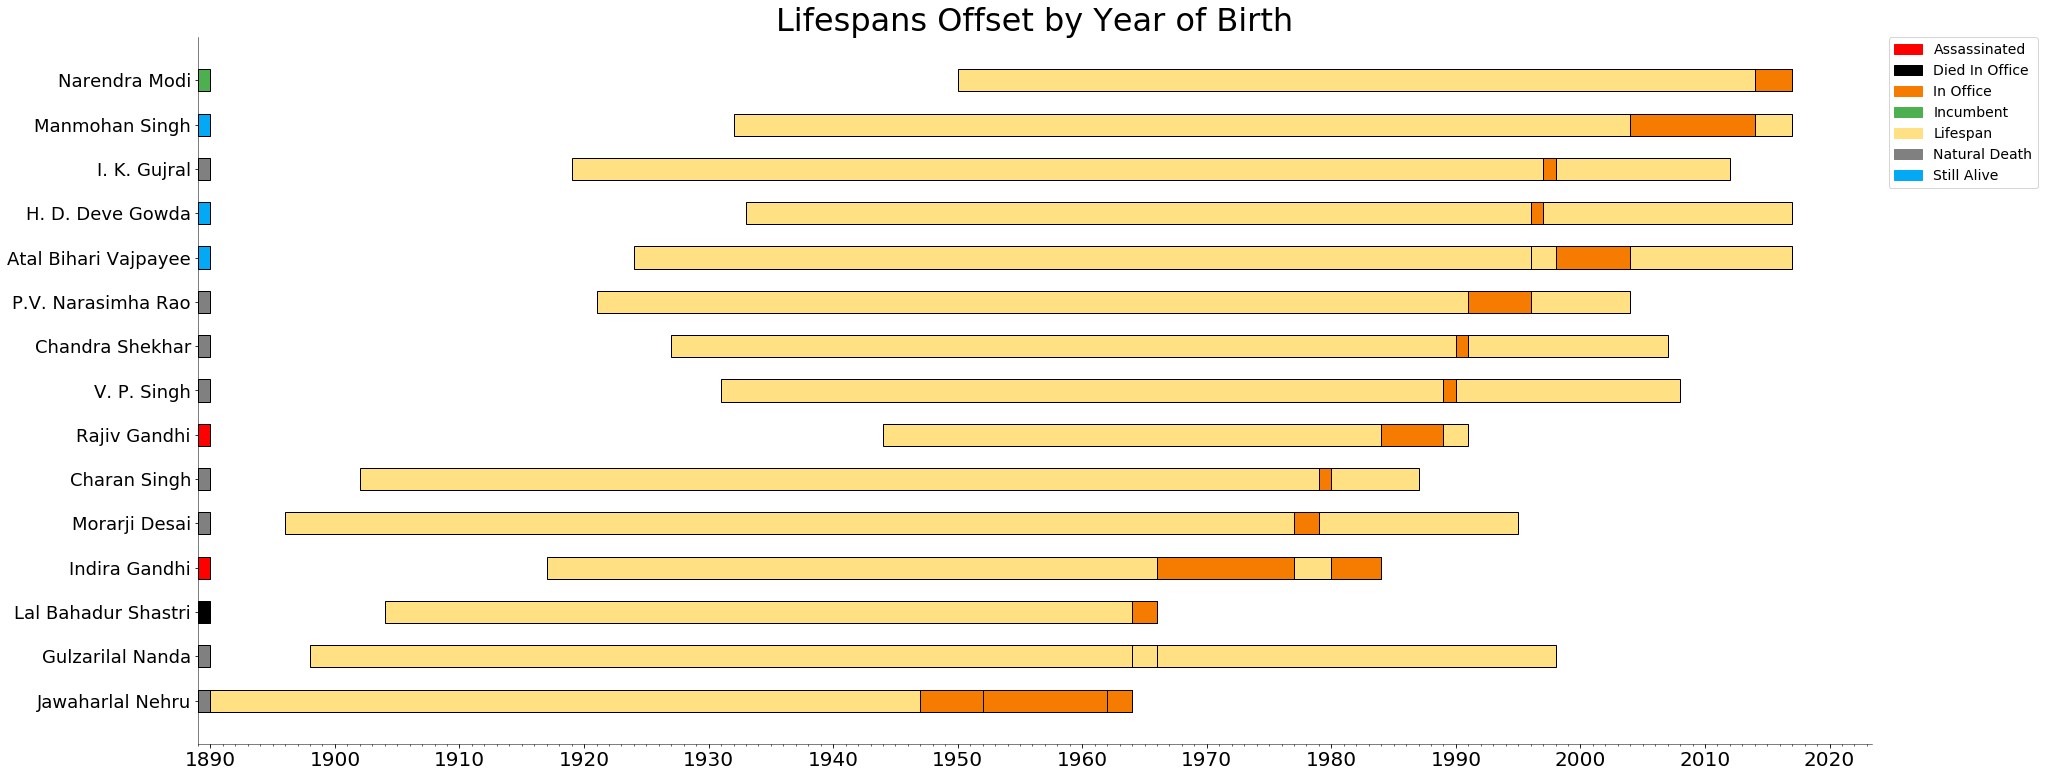

In [3]:
ax = plt.gca()
zero = min([x.year for x in table["Date of Birth"]])
for i, pm in enumerate(pm_age_df["Name"]):
    pm_terms_df = table.loc[table["Name"] == pm]
    first = True
    for ix, row in pm_terms_df.iterrows():
        if first:
            first = False
            year_of_birth = row["Date of Birth"].year
            year_of_death = row["Date of Death"].year if not pd.isnull(row["Date of Death"]) else datetime.date.today().year
            ax.barh(bottom=i, height=0.5, 
                    left=year_of_birth, width=year_of_death-year_of_birth, 
                    color=colors["lifespan"], edgecolor=edgecolor)

            if row["Mode of Death"] == "Assassination":
                stat_color = colors["assassinated"] # assassinated
            elif pd.isnull(row["Date of Death"]):
                if not pd.isnull(row["Term End"]):
                    stat_color=colors["still alive"] # Still Alive
                else:
                    stat_color = colors["incumbent"] # Incumbent
            else:
                if row["Mode of Death"] != "Assassination" and row["Term End"] == row["Date of Death"]:
                    stat_color = colors["died in office"] # died in office.
                else:
                    stat_color = colors["natural death"]    
        term_start_year = row["Term Start"].year
        term_end_year = row["Term End"].year if not pd.isnull(row["Term End"]) else datetime.date.today().year
        
        ax.barh(bottom=i, height=0.5, 
                left=term_start_year, width=term_end_year-term_start_year, 
                color=colors["in office"], edgecolor=edgecolor)


    ax.barh(bottom=i, height=0.5, left=zero, width=1, color=stat_color, edgecolor=edgecolor)

majorLocator = MultipleLocator(10)
majorFormatter = FormatStrFormatter('%d')
minorLocator = MultipleLocator(1)
ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_major_formatter(majorFormatter)
ax.xaxis.set_minor_locator(minorLocator)

names = list(pm_age_df["Name"])
ax.set_yticks(range(len(names)))
ax.set_yticklabels(names, fontsize=18)
ax.set_title("Lifespans Offset by Year of Birth", fontsize=32)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)

handles = []
for key in sorted(colors.keys()):
    patch = mpatches.Patch(color=colors[key], label=key.title(), edgecolor="black")
    handles.append(patch)
plt.legend(handles=handles, fontsize=14, bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
plt.savefig("primeministers_offset.png", dpi=220)